In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [9]:
os.environ['CUDA_VISIBLE_DEVICES']='2'

In [14]:
train_dir=r'D:\deeplearning\signlang_final_dataset\asl_alphabet_train'
validation_dir=r'D:\deeplearning\signlang_final_dataset\asl_alphabet_validation'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical')
validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="categorical")

Found 86335 images belonging to 29 classes.
Found 688 images belonging to 29 classes.


(20, 150, 150, 3)


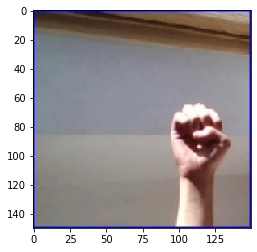

(20, 150, 150, 3)


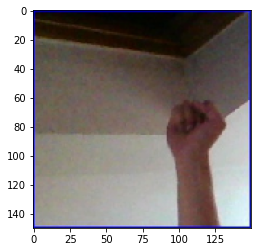

(20, 150, 150, 3)


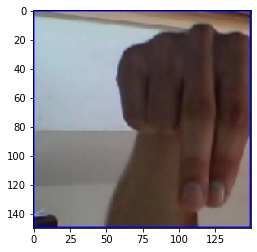

(20, 150, 150, 3)


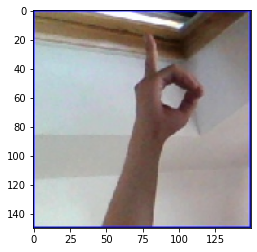

(20, 150, 150, 3)


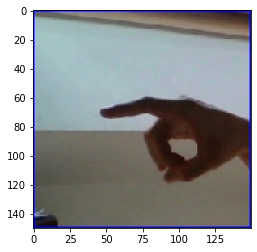

In [4]:
for _ in range(5):
    img, label = train_generator.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers
model=models.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),padding='same',input_shape=(150,150,3),activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(29,activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

In [7]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['acc'])

In [10]:
history=model.fit(train_generator,steps_per_epoch=4300,
                           epochs=30,
                           validation_data=validation_generator,
                           validation_steps=34)

Epoch 1/30
4300/4300 [==============================] - 189s 44ms/step - loss: 1.9947 - acc: 0.3680 - val_loss: 0.9710 - val_acc: 0.6897
Epoch 2/30
4300/4300 [==============================] - 50s 12ms/step - loss: 0.9726 - acc: 0.6596 - val_loss: 0.3971 - val_acc: 0.8941
Epoch 3/30
4300/4300 [==============================] - 48s 11ms/step - loss: 0.5695 - acc: 0.7994 - val_loss: 0.1940 - val_acc: 0.9412
Epoch 4/30
4300/4300 [==============================] - 49s 11ms/step - loss: 0.3722 - acc: 0.8697 - val_loss: 0.1335 - val_acc: 0.9632
Epoch 5/30
4300/4300 [==============================] - 49s 11ms/step - loss: 0.2634 - acc: 0.9087 - val_loss: 0.1056 - val_acc: 0.9676
Epoch 6/30
4300/4300 [==============================] - 49s 11ms/step - loss: 0.1903 - acc: 0.9338 - val_loss: 0.0425 - val_acc: 0.9882
Epoch 7/30
4300/4300 [==============================] - 48s 11ms/step - loss: 0.1529 - acc: 0.9474 - val_loss: 0.0452 - val_acc: 0.9868
Epoch 8/30
4300/4300 [=========================

In [26]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
test_dir=r'D:\deeplearning\signlang_final_dataset\asl_alphabet_test\B_test.jpg'
img = image.load_img(test_dir, target_size=(150,150))
# Preprocessing the image
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
print(x.shape)
preds = model.predict_classes(x)

(1, 150, 150, 3)


In [27]:
preds

array([1], dtype=int64)